<a href="https://colab.research.google.com/github/beastNico/Data-Analysis/blob/main/Home_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Dream Housing Finance Company is involved in providing home loans and operates across urban, semi-urban, and rural areas. Customers are required to apply for home loans, after which the company evaluates their eligibility. The company aims to automate the loan eligibility process in real time using customer details submitted through an online application form.

The details provided include Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and other relevant factors. To automate this process, the task is defined to identify customer segments that are eligible for loan amounts so that the company can target these customers more effectively.

The problem is framed as a **supervised classification** task, where the objective is to predict whether a loan will be approved or not. In a classification task, discrete values are predicted based on a given set of independent variables.

*   **Supervised:** Labels are provided in the training data, and a model is trained to learn the mapping between features and labels.
*   **Binary Classification:** The prediction involves two possible classes.
*   **Multiclass Classification:** The prediction involves three or more classes.

Loan prediction is treated as a real-world problem faced by retail banks to automate eligibility verification.

# Hypothesis Generation

*   Higher applicant income is assumed to increase the likelihood of loan approval.
*   Applicants with a positive credit or repayment history are expected to have a higher probability of approval.
*   Smaller loan amounts are assumed to have a higher chance of being approved.
*   Shorter loan terms are likely to result in a greater probability of approval.
*   Lower EMI values are expected to improve the chances of approval.

# About The Data:

Given below is the description for each variable.

| Variable           | Description                           |
| :----------------- | :------------------------------------ |
| Loan_ID            | Unique Loan ID                        |
| Gender             | Male/ Female                          |
| Married            | Applicant married (Y/N)               |
| Dependents         | Number of dependents                  |
| Education          | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed      | Self employed (Y/N)                   |
| ApplicantIncome    | Applicant income                      |
| CoapplicantIncome  | Coapplicant income                    |
| LoanAmount         | Loan amount in thousands              |
| Loan_Amount_Term   | Term of loan in months                |
| Credit_History     | credit history meets guidelines       |
| Property_Area      | Urban/ Semi Urban/ Rural              |
| Loan_Status        | Loan approved (Y/N)                   |

##Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

##Load the data

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Datasets/train.csv'
test_path = '/content/drive/MyDrive/Datasets/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

Mounted at /content/drive


In [3]:
#Copy of Original Data (for emergency recovery)
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


##Shape of the dataset

In [7]:
print('Trainig data shape: ', train.shape)
train.head()

Trainig data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


##Univariate Analysis

Univariate analysis is performed to examine each variable individually.

For categorical features, frequency tables or bar plots are used to show the count of each category.

For numerical features, probability density plots are used to view the distribution.

In [9]:
##Target value
train['Loan_Status'].count()

np.int64(614)

In [10]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [11]:
train['Loan_Status'].value_counts(normalize=True)*100

,proportion
Loan_Status,
Y,68.729642
N,31.270358


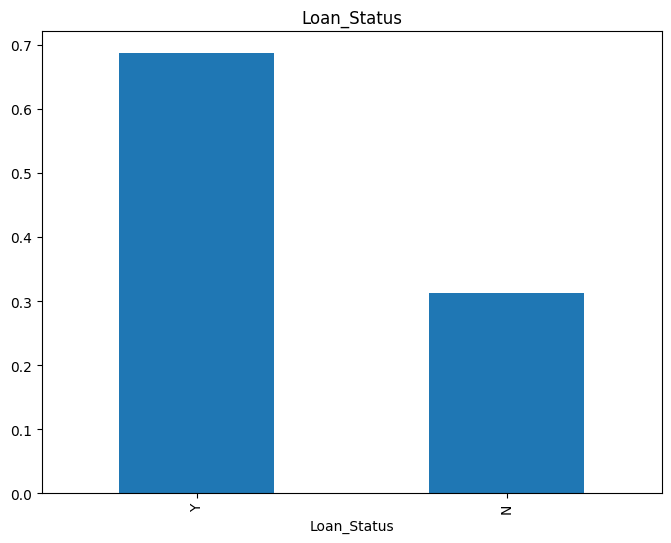

In [12]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Loan_Status')
plt.show()

The loan of 422(around 69%) people out of 614 was approved.

##Independent Variable (Categorical)

In [13]:
train['Gender'].count()

np.int64(601)

In [14]:
train['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


Among 601 person: Male : 489 Female : 112

In [15]:
train['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Male,81.364393
Female,18.635607


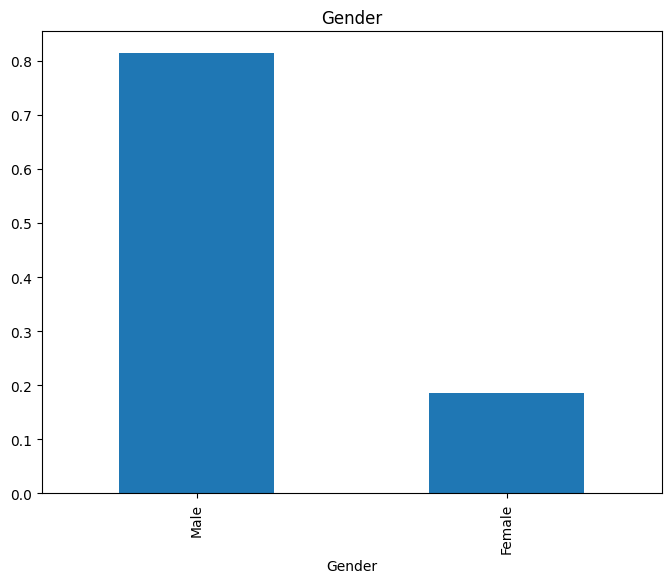

In [16]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Gender')
plt.show()

"Gender" contains Male: 81% and Female: 19%

In [17]:
train['Married'].count()

np.int64(611)

In [18]:
train['Married'].value_counts()

,count
Married,
Yes,398
No,213


Total number of people : 611

Married : 398

Unmarried : 213

In [19]:
train['Married'].value_counts(normalize=True)*100

,proportion
Married,
Yes,65.139116
No,34.860884


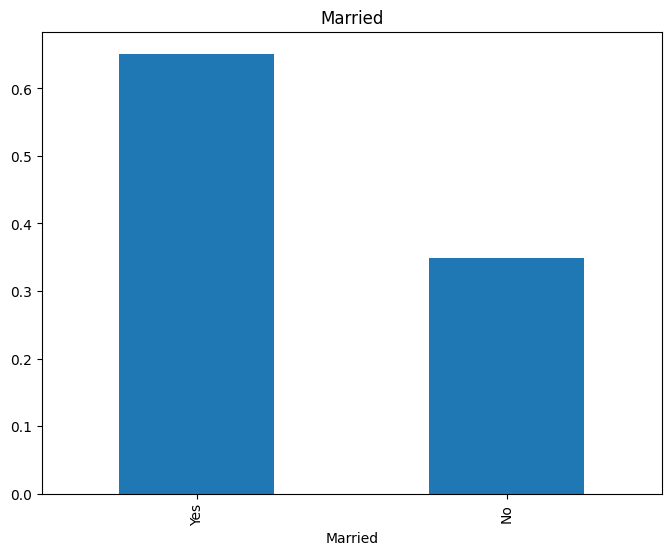

In [20]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Married')
plt.show()

65% people are married and
35% people are non married

In [21]:
train['Self_Employed'].count()

np.int64(582)

In [22]:
train['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


Self Employed : 82

Not Self Employed : 500

In [23]:
train['Self_Employed'].value_counts(normalize=True)*100

,proportion
Self_Employed,
No,85.910653
Yes,14.089347


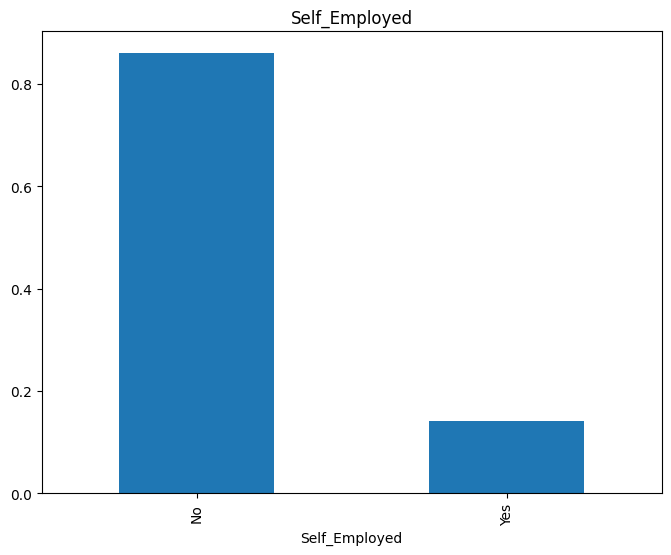

In [24]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Self_Employed')
plt.show()

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

In [25]:
train['Credit_History'].count()

np.int64(564)

In [26]:
train['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


Total number of debts : 564

Repaid Debts : 475

Not Repaid Debts : 89

In [27]:
train['Credit_History'].value_counts(normalize=True)*100

,proportion
Credit_History,
1.0,84.219858
0.0,15.780142


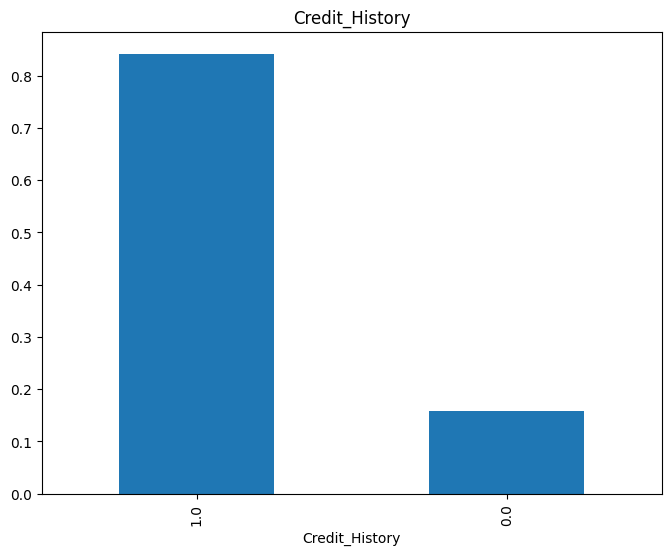

In [28]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Credit_History')
plt.show()

Around 84% applicants have repaid their debts.

##Independent Variable (Ordinal)

In [29]:
train['Dependents'].count()

np.int64(599)

In [30]:
train['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


Size of the 'Dependent' variable is 599

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

In [31]:
train['Dependents'].value_counts(normalize=True)*100

,proportion
Dependents,
0,57.595993
1,17.028381
2,16.861436
3+,8.514190


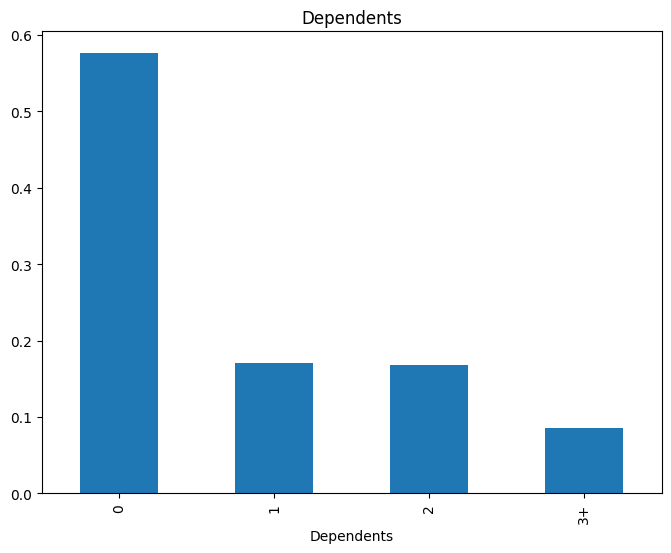

In [32]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Dependents')
plt.show()

57.5% people have 0 dependents

17% people have 1 dependents

17% people have 2 dependents

8.5% people have 3+ dependents

In [33]:
train['Education'].count()

np.int64(614)

In [34]:
train['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


Out of 614 people 480 are graduated and 134 are not graduated

In [35]:
train['Education'].value_counts(normalize=True)*100

,proportion
Education,
Graduate,78.175896
Not Graduate,21.824104


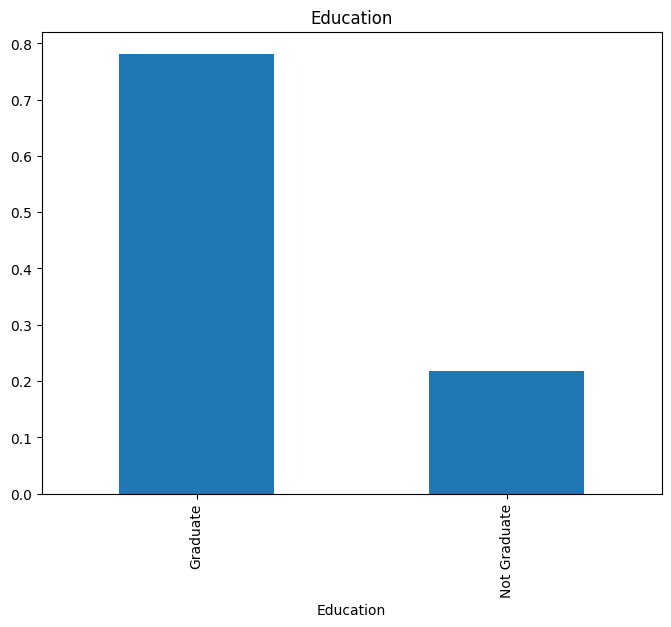

In [36]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Education')
plt.show()

78% people are graduated and 22% people are not graduated

In [37]:
train['Property_Area'].count()

np.int64(614)

In [38]:
train['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179

In [39]:
train['Property_Area'].value_counts(normalize=True)*100

,proportion
Property_Area,
Semiurban,37.947883
Urban,32.899023
Rural,29.153094


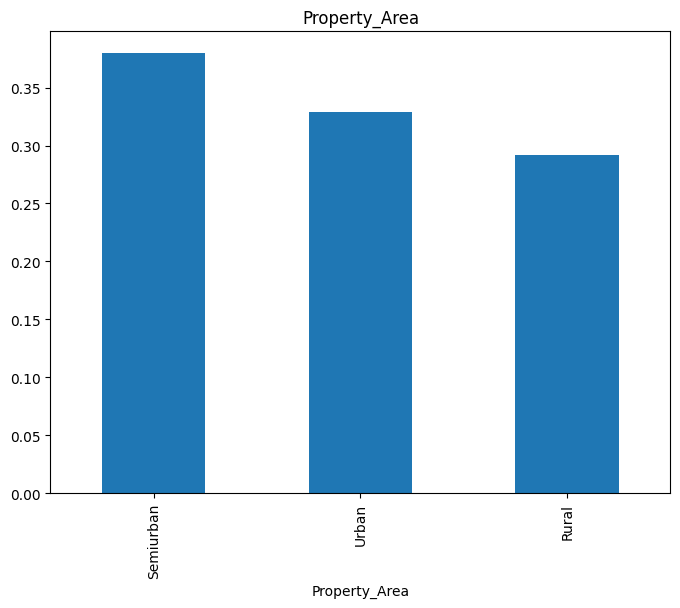

In [40]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(8,6), title='Property_Area')
plt.show()

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

##Independent Variable (Numerical)

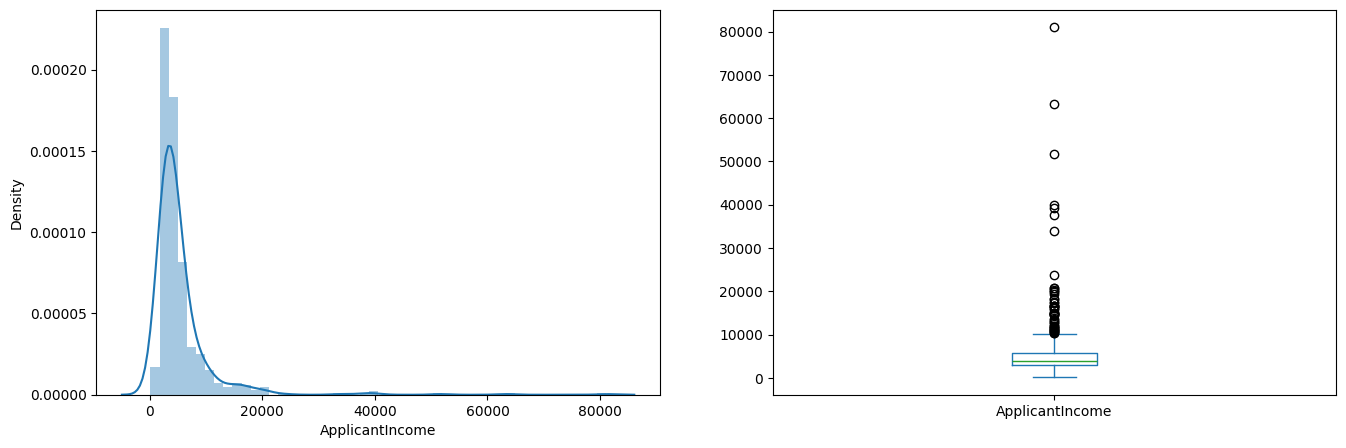

In [41]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Most applicant incomes are left-skewed, indicating non-normal distribution. The boxplot shows several outliers due to income disparity.

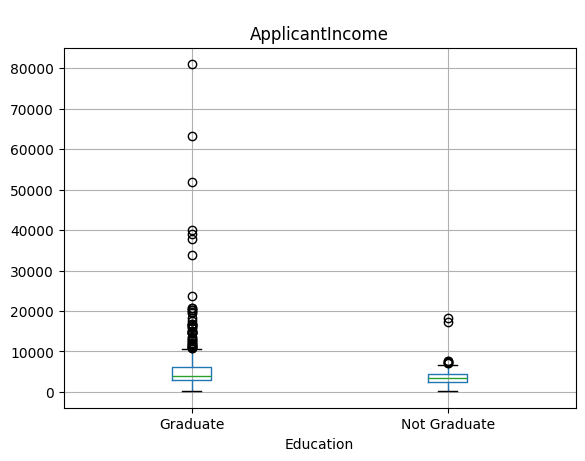

In [42]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle(" ")
plt.show()

A higher number of graduates have very high incomes, appearing as outliers.

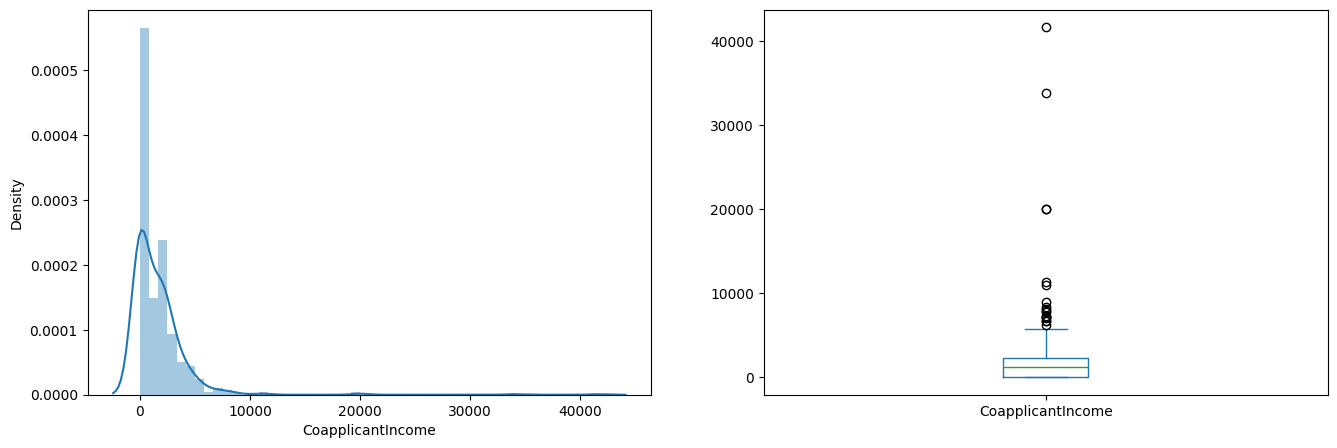

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The coapplicant income shows a similar distribution to applicant income, mostly ranging from 0 to 5000, with many outliers and a non-normal distribution.

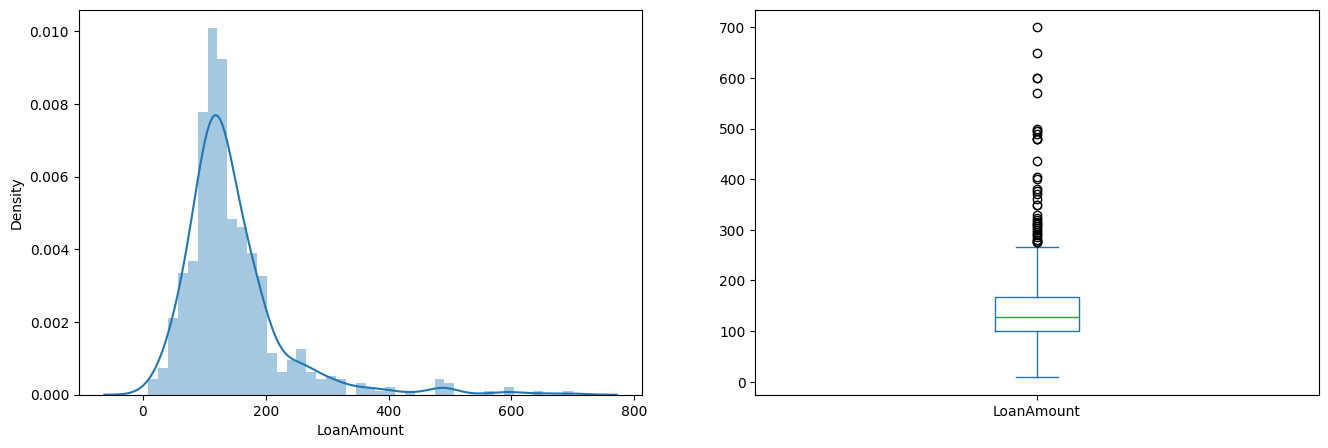

In [44]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

The variable shows several outliers, but the overall distribution is fairly normal.

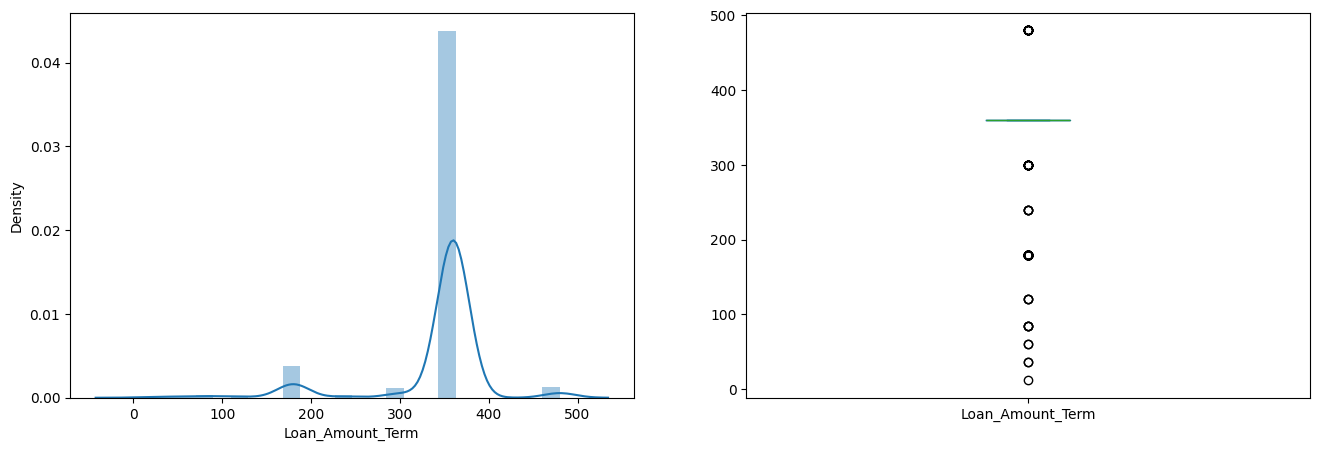

In [45]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term'])

plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5))
plt.show()

Also, The variable shows several outliers, but the overall distribution is fairly normal.

##Bivariate Analysis

Categorical Independent Variable vs Target Variable

Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


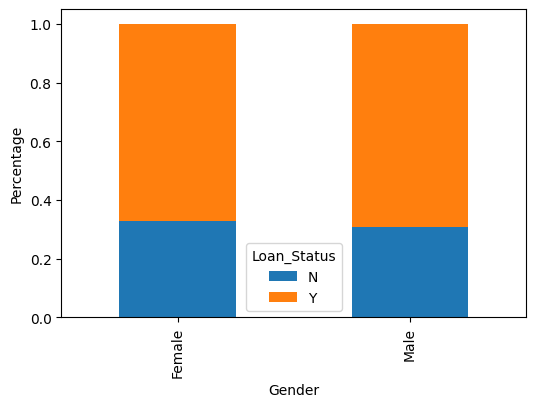

In [46]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 339

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 150

Proportion of Male applicants is higher for the approved loans.

Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


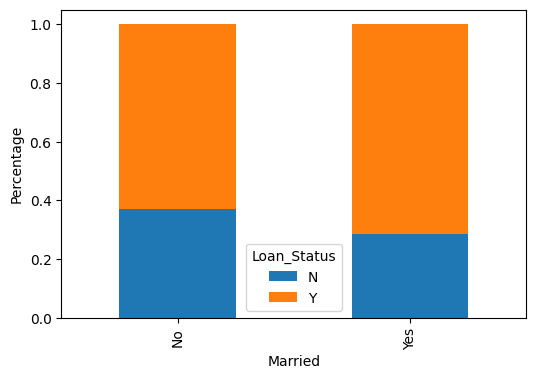

In [47]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married = pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 285

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


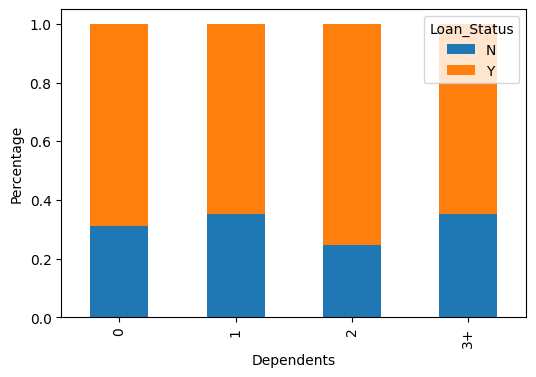

In [48]:
print(pd.crosstab(train["Dependents"],train["Loan_Status"]))
Dependents = pd.crosstab(train["Dependents"],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0 and Loan was approed : 238

Number of dependents on the loan applicant : 0 and Loan was not approed : 107

Number of dependents on the loan applicant : 1 and Loan was approed : 66

Number of dependents on the loan applicant : 1 and Loan was not approed : 36

Number of dependents on the loan applicant : 2 and Loan was approed : 76

Number of dependents on the loan applicant : 2 and Loan was not approed : 25

Number of dependents on the loan applicant : 3+ and Loan was approed : 33

Number of dependents on the loan applicant : 3+ and Loan was not approed : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

Relation between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


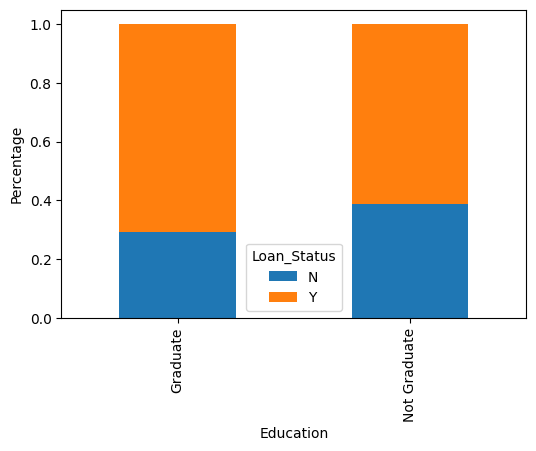

In [49]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Number of people who are Graduate and Loan was approed : 340

Number of people who are Graduate and Loan was no approed : 140

Number of people who are Not Graduate and Loan was approed : 82

Number of people who are Not Graduate and Loan was not approed : 52

Proportion of Graduate applicants is higher for the approved loans.

Relation between "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


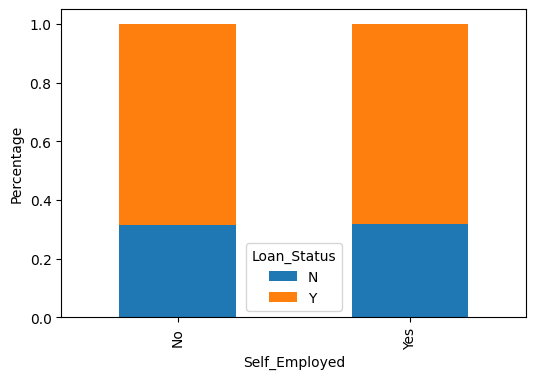

In [50]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
Self_Employed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

People who are Self_Employed and Loan was approed : 56

People who are Self_Employed and Loan was not approed : 26

People who are not Self_Employed and Loan was approed : 343

People who are not Self_Employed and Loan was not approed : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Relation between "Loan_Status" and "Credit_History"

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


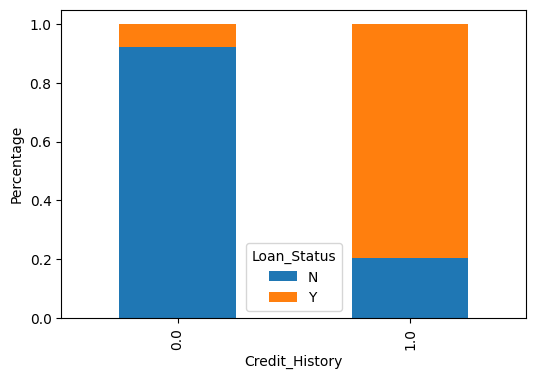

In [51]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
Credit_History = pd.crosstab(train["Credit_History"],train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

Relation between "Loan_Status" and "Property_Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


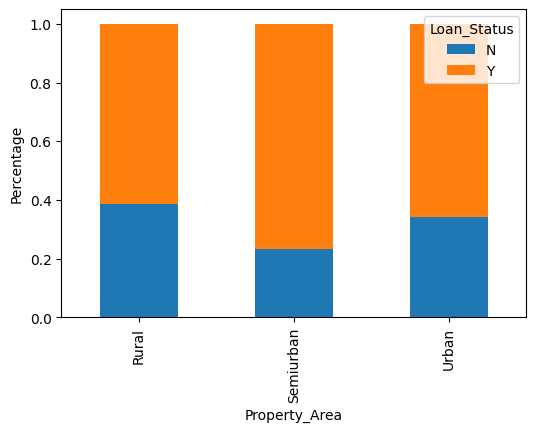

In [52]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
Property_Area = pd.crosstab(train["Property_Area"],train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Property_Area")
plt.ylabel("Percentage")
plt.show()

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

##Numerical Independent Variable vs Target Variable

Relation between "Loan_Status" and "Income"

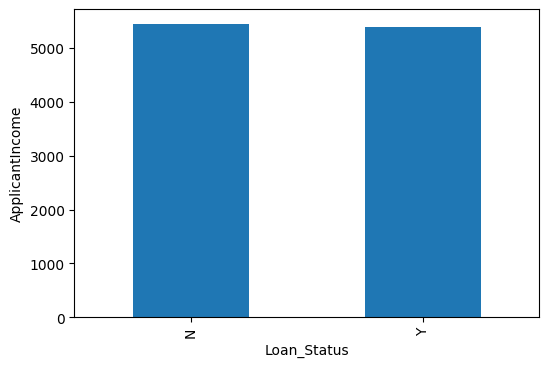

In [53]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar(figsize=(6,4))
plt.xlabel("Loan_Status")
plt.ylabel("ApplicantIncome")
plt.show()

In [54]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


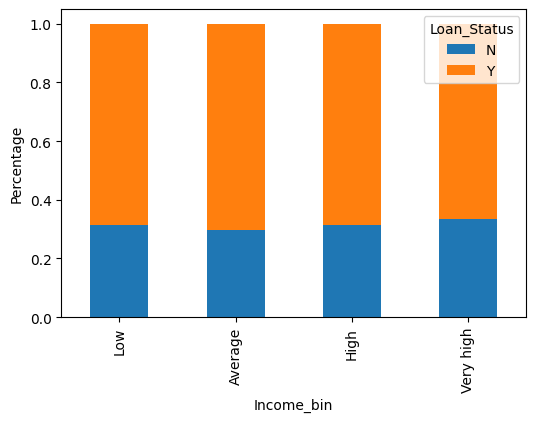

In [55]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Income_bin")
plt.ylabel("Percentage")
plt.show()

Applicant income does not appear to affect loan approval, contradicting the hypothesis that higher income increases approval chances.

In [56]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   19
Average                61  161
High                   32   65


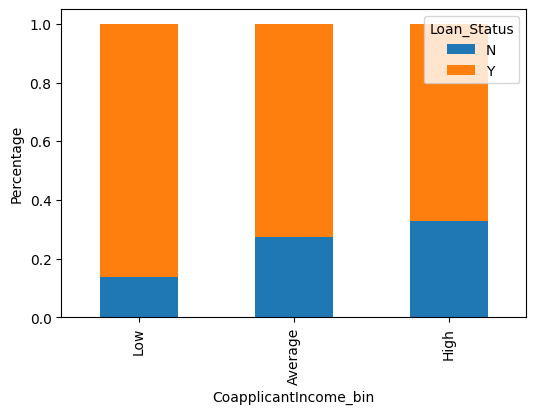

In [57]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("CoapplicantIncome_bin")
plt.ylabel("Percentage")
plt.show()

Loan approval is higher when coapplicant income is low, which seems misleading. This is likely because many applicants have no coapplicant, resulting in zero coapplicant income. A new variable combining applicant and coapplicant income can be created to analyze the combined effect on loan approval.

In [58]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

In [59]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
train['TotalIncome_bin']=pd.cut(train['TotalIncome'],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very high        81  166


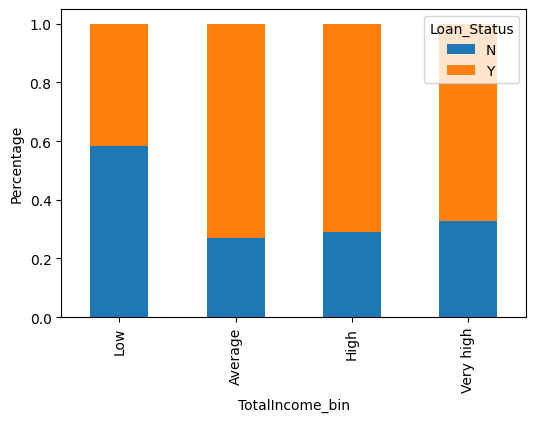

In [60]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome_bin = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("TotalIncome_bin")
plt.ylabel("Percentage")
plt.show()

Low TotalIncome: 10 approved, 14 not approved.

Average TotalIncome: 87 approved, 32 not approved.

High TotalIncome: 159 approved, 65 not approved.

Very High TotalIncome: 166 approved, 81 not approved.

Loan approval is much lower for applicants with low TotalIncome.

Relation between "Loan_Status" and "Loan Amount"

In [61]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         103  255
High             31   49


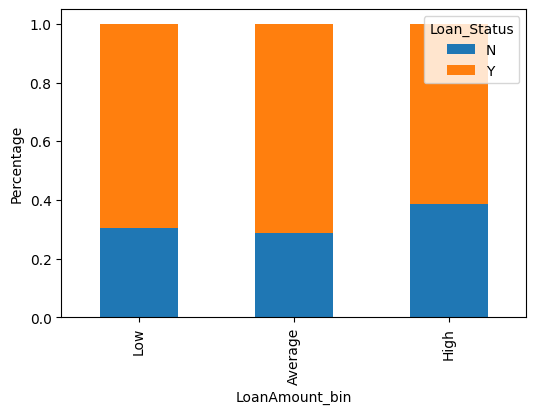

In [62]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount_bin = pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("LoanAmount_bin")
plt.ylabel("Percentage")
plt.show()

Low LoanAmount: 107 approved, 47 not approved.

Average LoanAmount: 255 approved, 103 not approved.

High LoanAmount: 49 approved, 31 not approved.

Loan approval is higher for applicants with lower loan amounts.

In [63]:
#drop the bins
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [64]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Correlation between numerical variables is visualized using a heatmap. Darker colors indicate stronger correlations between variables.

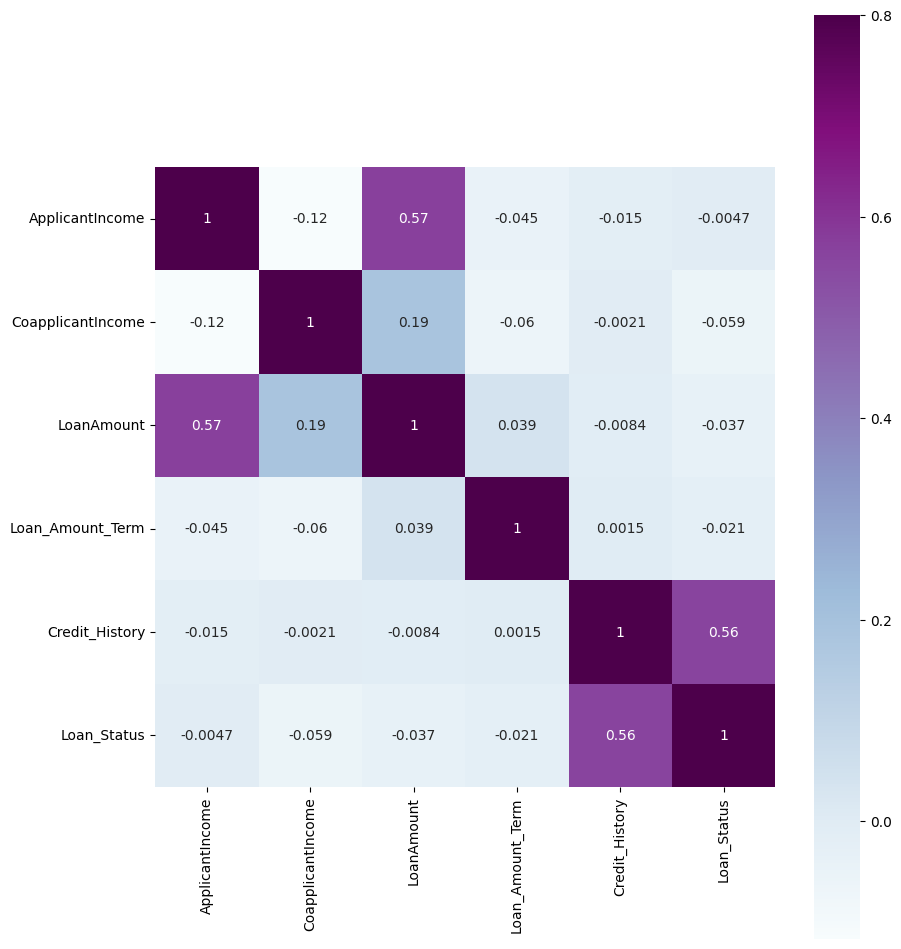

In [65]:
matrix = train.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)
plt.show()

##Missing Value and Outlier Treatment

Missing value imputation

In [66]:
train = train_original

In [67]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Missing values are present in **Gender**, **Married**, **Dependents**, **Self_Employed**, **LoanAmount**, **Loan_Amount_Term**, and **Credit_History**.

For imputation, the **median** is used for numerical variables,

and the **mode** is used for categorical variables.

In [68]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [69]:
train['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


The most frequent value in the **Loan_Amount_Term** variable is **360**, so the missing values in this feature are replaced with its mode.


In [70]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [71]:
train['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,526
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


For the **LoanAmount** variable, missing values are imputed using the **median**, since the data contains outliers and the mean would be skewed by them.

In [72]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [73]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [74]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [75]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [76]:
test.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


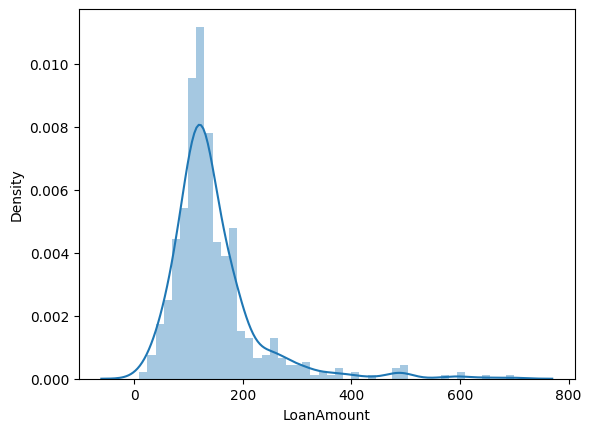

In [77]:
sns.distplot(train['LoanAmount']);

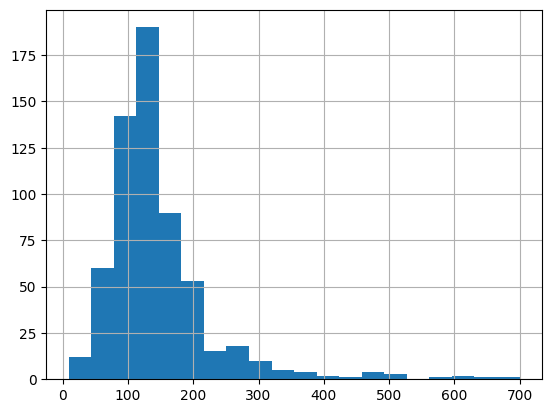

In [78]:
train['LoanAmount'].hist(bins=20);

The **LoanAmount** variable shows right skewness, with most data concentrated on the left and a longer right tail. Applying a **log transformation** reduces the effect of large values, resulting in a distribution closer to normal.

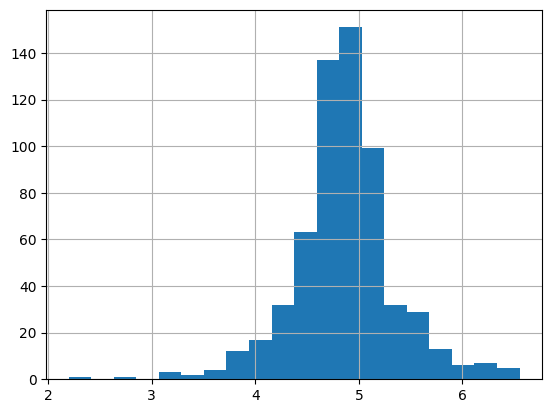

In [79]:
#log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20);

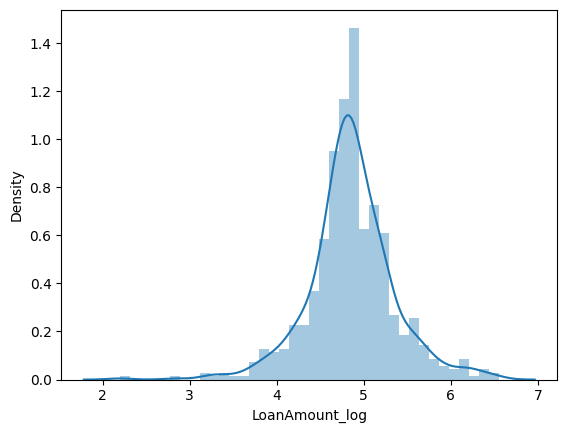

In [80]:
sns.distplot(train['LoanAmount_log']);

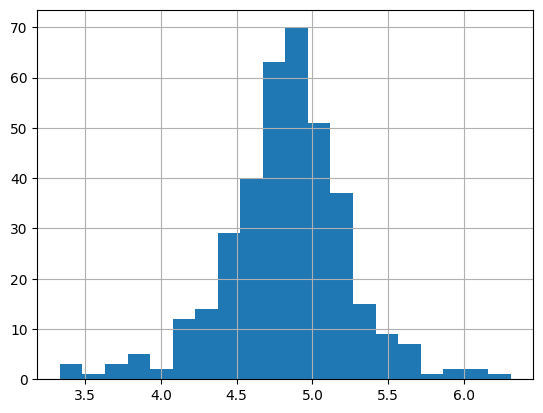

In [81]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20);

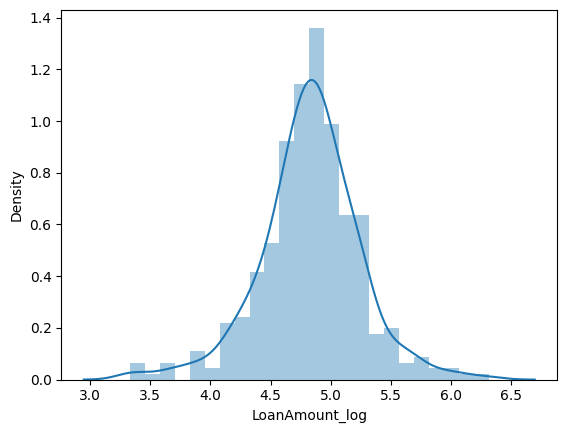

In [82]:
sns.distplot(test['LoanAmount_log']);

##Feature Engineering

Based on domain knowledge, three new features are created:

* **Total Income:** Combination of Applicant Income and Coapplicant Income to represent overall earning capacity.
* **EMI:** Calculated as the ratio of Loan Amount to Loan Amount Term, representing the monthly repayment burden.
* **Balance Income:** Difference between Total Income and EMI, indicating remaining income after repayment and the applicant’s repayment ability.

In [83]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

In [84]:
train['TotalIncome'].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [85]:
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']

In [86]:
test['TotalIncome'].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


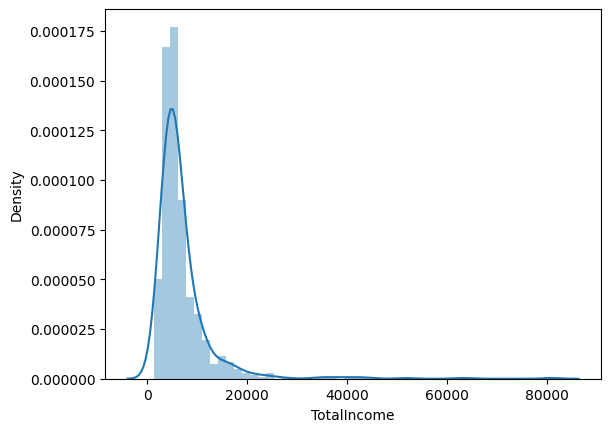

In [87]:
sns.distplot(train['TotalIncome']);

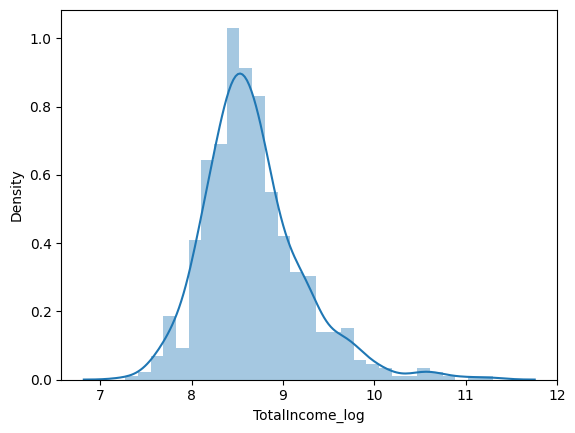

In [88]:
train['TotalIncome_log'] = np.log(train['TotalIncome'])
sns.distplot(train['TotalIncome_log']);

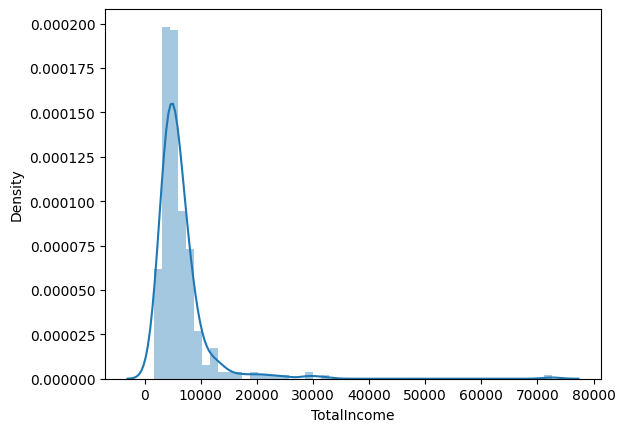

In [89]:
sns.distplot(test['TotalIncome']);

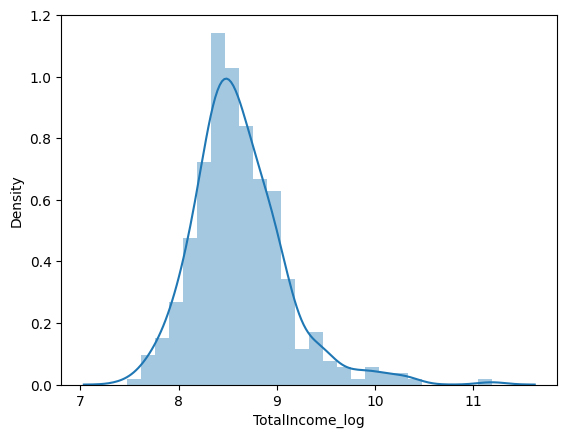

In [90]:
test['TotalIncome_log'] = np.log(test['TotalIncome'])
sns.distplot(test['TotalIncome_log']);

Create the EMI feature

In [91]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [92]:
train['EMI'].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [93]:
test['EMI'].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


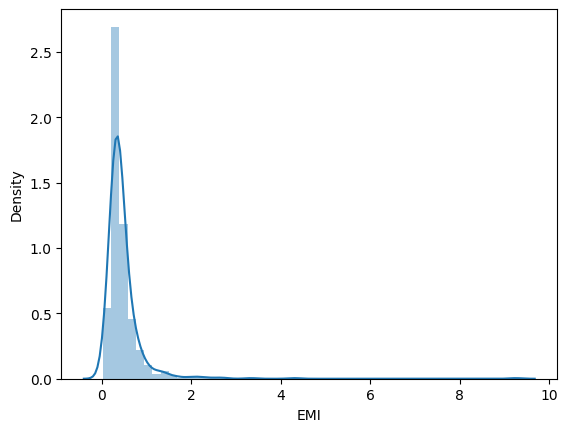

In [94]:
sns.distplot(train['EMI']);

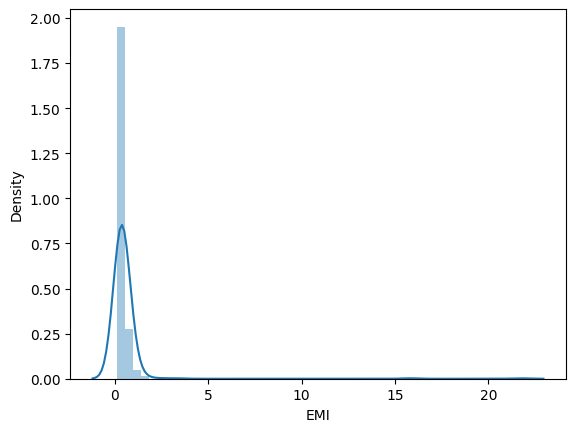

In [95]:
sns.distplot(test['EMI']);

Create Balance Income Feature

In [96]:
train['Balance_Income']=train['TotalIncome']-train['EMI']*1000
test['Balance_Income']=test['TotalIncome']-test['EMI']

In [97]:
train['Balance_Income'].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [98]:
test['Balance_Income'].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


The original variables used to create the new features are dropped to avoid multicollinearity, as they are highly correlated with the derived features. This also helps reduce noise and ensures better model performance, especially for logistic regression, which assumes low correlation between predictors.

In [99]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
test=test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,0.391667,5608.333333


In [100]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.700480,5720,8.651724,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.836282,4576,8.428581,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,5.337538,6800,8.824678,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.605170,4886,8.494129,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.356709,3276,8.094378,0.216667,3275.783333


##Model Building

After feature creation, model building begins with multiple algorithms to compare performance:

i) Logistic Regression

ii) Decision Tree

iii) Random Forest

iv) Random Forest with Grid Search

v) XGBClassifier

Before training, the **“Loan_ID”** column is dropped from both the train and test datasets since it does not influence the loan approval outcome.

In [101]:
train=train.drop(["Loan_ID"],axis=1)
test=test.drop(["Loan_ID"],axis=1)

In [102]:
#drop the target variable "Loan_Status"
X=train.drop(["Loan_Status"],axis=1)

In [103]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,4.189655,3000.0,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,4.787492,4941.0,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,4.948760,6000.0,8.699515,0.391667,5608.333333


In [104]:
#save the target variable "Loan_Status" in another dataset
y=train["Loan_Status"]

In [105]:
y.head(2)

,Loan_Status
0,Y
1,N


Dummy variables are created for categorical features to convert them into numerical form.
For example, the **“Gender”** variable with classes *Male* and *Female* is converted into **Gender_Male** and **Gender_Female**.
Here, **Gender_Male = 1** if the applicant is male and **0** if female, enabling the model to interpret categorical data numerically.

In [106]:
X = pd.get_dummies(X, dtype=int)
X = X.astype(int)

In [107]:
X.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4,5849,8,0,5493,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,1,4,6091,8,0,5735,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,1,4,3000,8,0,2816,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [108]:
# Apply get_dummies to train and test separately
train = pd.get_dummies(train, dtype=int)
test = pd.get_dummies(test, dtype=int)

In [109]:
train.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1


In [110]:
test.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.700480,5720,8.651724,0.305556,5719.694444,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,1.0,4.836282,4576,8.428581,0.350000,4575.650000,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,1.0,5.337538,6800,8.824678,0.577778,6799.422222,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


The training dataset is split into two parts - **train** and **validation** - to evaluate model performance before testing.
The model is trained on the training portion and validated on the validation portion, where true labels are available.
The **train_test_split** function from **sklearn** is used to perform this division.

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

##Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [113]:
logistic_model = LogisticRegression(random_state=1)

In [114]:
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [115]:
#Predit the Loan_Status for validation set
pred_cv_logistic = logistic_model.predict(X_val)

In [116]:
#Calculate how accurate the predictions are by calculating the accuracy
score_logistic = accuracy_score(y_val, pred_cv_logistic)*100
print(score_logistic)

78.91891891891892


The predictions are almost 79% accurate by doing logistic regression

##Decision Tree

In [117]:
#Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [118]:
tree_model = DecisionTreeClassifier(random_state=1)

In [119]:
#Fit the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [120]:
pred_cv_tree = tree_model.predict(X_val)

In [121]:
score_tree = accuracy_score(y_val, pred_cv_tree)*100
print(score_tree)

72.43243243243244


The predictions are almost 72.5% accurate by doing Decision Tree model

##Random Forest

i) **Random Forest** is a tree-based ensemble method that combines multiple weak learners (decision trees) to create a strong predictive model.

ii) Each tree is trained on a random subset of rows and features, introducing diversity among the trees.

iii) The final prediction is obtained by aggregating the outputs of all individual trees, typically through majority voting or averaging.

In [122]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [123]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [124]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [125]:
pred_cv_forest = forest_model.predict(X_val)

In [126]:
score_forest = accuracy_score(y_val, pred_cv_forest)*100
print(score_forest)

77.83783783783784


The predictions are almost 78% accurate by doing Random Forest model

#Random Forest with Grid-search

Model accuracy is improved by tuning hyperparameters using **Grid Search**, which systematically tests combinations of parameter values to find the best-performing set.
The parameters tuned are:

* **max_depth:** Maximum depth of each decision tree.
* **n_estimators:** Number of trees in the Random Forest ensemble.

In [127]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

In [128]:
paramgrid = {'max_depth': np.arange(1,20,2), 'n_estimators': np.arange(1,200,20)}

In [129]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [130]:
#Fit the grid search model
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181])})

In [131]:
#Find the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=np.int64(5), n_estimators=np.int64(61),
                       random_state=1)

The optimized value for the max_depth variable is 3 and for n_estimator is 101,random_state = 1

In [132]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=101)

In [133]:
grid_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=101, random_state=1)

In [134]:
pred_grid_forest = grid_forest_model.predict(X_val)

In [135]:
score_grid_forest = accuracy_score(y_val, pred_grid_forest)*100
print(score_grid_forest)

74.5945945945946


The predictions are almost 74% accurate by doing Random Forest model with grid search

##XGBoost

**XGBoost** is a fast and efficient gradient boosting algorithm that handles numeric features effectively. Since all categorical variables have been converted into numeric form, it can be directly applied.

Key parameters used in the model:

* **n_estimators**: Defines the number of trees to be built.
* **max_depth**: Sets the maximum depth of each tree, controlling model complexity and preventing overfitting.

The model is then initialized using **XGBClassifier**, and the data is fitted to train the model.

In [136]:
from xgboost import XGBClassifier

In [137]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)

In [139]:
xgb_model.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [140]:
pred_xgb = xgb_model.predict(X_val)

In [142]:
score_xgb = accuracy_score(y_val.replace({'Y': 1, 'N': 0}), pred_xgb)*100
print(score_xgb)

78.37837837837837


The predictions are almost 78% accurate by doing XGBClassifier model

Logistic Regression model gives : 79% prediction accuracy

Decision Tree model gives : 72.5% prediction accuracy

Random Forest model gives : 78% prediction accuracy

Random Forest with Grid Search model gives : 74.5% prediction accuracy

XGBClassifier model gives : 78% prediction accuracy

##Find the important feature

Feature importance helps identify which variables contribute the most to model predictions. Since **Logistic Regression** does not have the `feature_importances_` attribute, we use the **Random Forest model**, which achieved one of the second-highest accuracies.

Using the **Random Forest model’s** `feature_importances_` attribute, we can determine and visualize the most influential features in predicting loan approval.

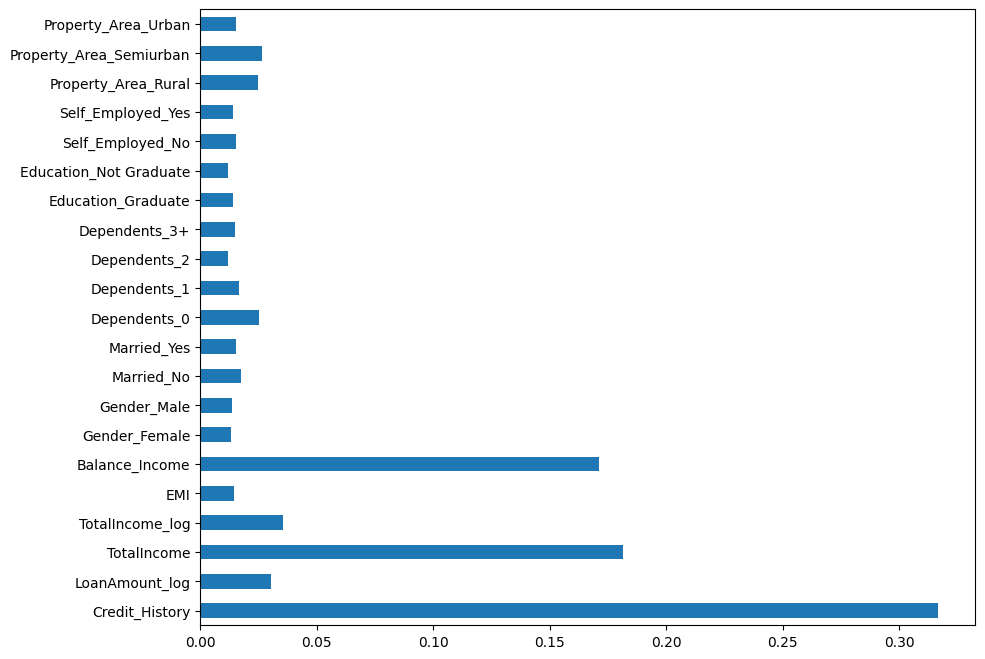

In [143]:
importances = pd.Series(forest_model.feature_importances_, index=X.columns)
importances.plot(kind='barh',figsize=(10,8))
plt.show()

It is observed that **Credit_History** , **TotalIncome_log** and **Balance_Income** are the most important features influencing loan approval. This shows that the **feature engineering** process significantly improved the model’s predictive performance.